In [ ]:
!pip install geoplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 40.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import imageio
from tqdm import tqdm_notebook
from folium.plugins import MarkerCluster
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import mapclassify as mc
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import scipy
from itertools import product
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [ ]:
df=pd.read_csv('/content/GlobalLandTemperaturesByMajorCity.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
df.isnull().sum()

,0
dt,0
AverageTemperature,11002
AverageTemperatureUncertainty,11002
City,0
Country,0
Latitude,0
Longitude,0


In [ ]:
df['AverageTemperature'].fillna(df['AverageTemperature'].mean(),inplace=True)
df['AverageTemperatureUncertainty'].fillna(df['AverageTemperatureUncertainty'].mode()[0],inplace=True)
df.isnull().sum()

<ipython-input-6-3e4b46e391ed>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AverageTemperature'].fillna(df['AverageTemperature'].mean(),inplace=True)
<ipython-input-6-3e4b46e391ed>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

,0
dt,0
AverageTemperature,0
AverageTemperatureUncertainty,0
City,0
Country,0
Latitude,0
Longitude,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'df' and has columns 'Latitude' and 'Longitude'

# Function to convert latitude and longitude to numerical values
def convert_to_numeric(value):
    """Converts latitude/longitude string to numeric value.
    """
    direction = value[-1]  # Get the last character (N, S, E, W)
    numeric_part = float(value[:-1])  # Get the numeric part
    if direction in ('S', 'W'):
        numeric_part *= -1  # Apply negative sign for South and West
    return numeric_part

# Applying the conversion to Latitude and Longitude columns
df['Latitude'] = df['Latitude'].apply(convert_to_numeric)
df['Longitude'] = df['Longitude'].apply(convert_to_numeric)

# Now you can scale the data
scaler = MinMaxScaler()
df[['Latitude_scaled', 'Longitude_scaled']] = scaler.fit_transform(df[['Latitude', 'Longitude']])

In [ ]:
df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying Min-Max scaling to 'AverageTemperature' column
df['AverageTemperature_scaled'] = scaler.fit_transform(df[['AverageTemperature']])

# Scaling other features like Latitude and Longitude if needed
df[['Latitude_scaled', 'Longitude_scaled']] = scaler.fit_transform(df[['Latitude', 'Longitude']])

# Check results
print(df[['AverageTemperature', 'AverageTemperature_scaled']].head())


   AverageTemperature  AverageTemperature_scaled
0              26.704                   0.822012
1              27.434                   0.833233
2              28.101                   0.843486
3              26.140                   0.813343
4              25.427                   0.802383


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['City_Label'] = label_encoder.fit_transform(df['City'])

# One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=['City'], prefix='City')
df_one_hot.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Latitude_scaled,Longitude_scaled,AverageTemperature_scaled,City_Label,...,City_São Paulo,City_Taipei,City_Taiyuan,City_Tangshan,City_Tianjin,City_Tokyo,City_Toronto,City_Umm Durman,City_Wuhan,City_Xian
0,1849-01-01,26.704,1.435,Côte D'Ivoire,5.63,-3.23,0.442733,0.426908,0.822012,0,...,False,False,False,False,False,False,False,False,False,False
1,1849-02-01,27.434,1.362,Côte D'Ivoire,5.63,-3.23,0.442733,0.426908,0.833233,0,...,False,False,False,False,False,False,False,False,False,False
2,1849-03-01,28.101,1.612,Côte D'Ivoire,5.63,-3.23,0.442733,0.426908,0.843486,0,...,False,False,False,False,False,False,False,False,False,False
3,1849-04-01,26.140,1.387,Côte D'Ivoire,5.63,-3.23,0.442733,0.426908,0.813343,0,...,False,False,False,False,False,False,False,False,False,False
4,1849-05-01,25.427,1.200,Côte D'Ivoire,5.63,-3.23,0.442733,0.426908,0.802383,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Assuming 'AverageTemperature' is the correct target variable name
X=df[['City']]
y=df['AverageTemperature']

# Perform the train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set features:")
X_train
print("Testing set features:")
X_test

Training set features:
Testing set features:


,City
165402,Nanjing
18258,Bangalore
209961,Singapore
42224,Cape Town
216990,Sydney
...,...
62837,Dar Es Salaam
35781,Cairo
121597,Lagos
135540,Luanda


In [ ]:
# Define Evaluation Metrics function
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_metrics(y_true, y_pred):
    # Mean Absolute Error
    mae = mean_absolute_error(y_true, y_pred)

    # Mean Squared Error
    mse = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error
    rmse = np.sqrt(mse)

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

    return mae, mse, rmse
df['PredictedTemperature'] = 0

y_true = df['AverageTemperature']
y_pred = df['PredictedTemperature']

# Evaluating the metrics
mae, mse, rmse = evaluate_metrics(y_true, y_pred)

Mean Absolute Error (MAE): 18.81
Mean Squared Error (MSE): 424.42
Root Mean Squared Error (RMSE): 20.60


In [ ]:
# Assuming 'change_year' is a list of years, extract unique years and sort them.
# Defining 'change_year' with example data (replace with your actual data)
change_year = [2020, 2021, 2022, 2021, 2023, 2020]

#Defining 'change_year_index' with example data (replace with your actual data)
change_year_index = [1, 2, 3, 4, 5, 6]

year_list = sorted(list(set(change_year)))

x_ticks_year_list = np.linspace(min(year_list), max(year_list), 10).astype(int)
change_year_index = np.array(change_year_index)
x_ticks_year_index = []
for i in range(1, len(x_ticks_year_list)):
    x_ticks_year_index.append(change_year_index[np.where(np.array(change_year) == x_ticks_year_list[i])][0])

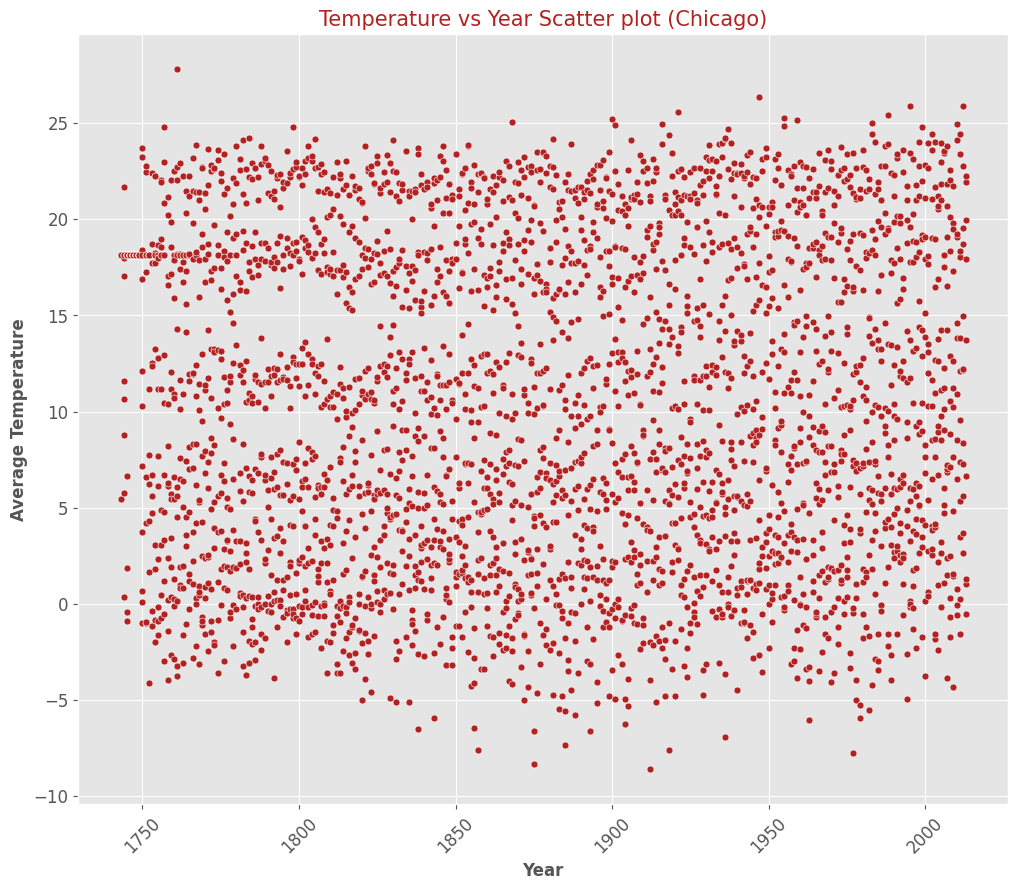

In [ ]:
# Filter data for the city 'Chicago'
chicago_data = df[df['City'] == 'Chicago']

# Drop rows with missing temperatures, if any
chicago_data = chicago_data.dropna(subset=['AverageTemperature'])

# Reset index after filtering
chicago_data.reset_index(drop=True, inplace=True)

# Convert 'dt' column to datetime if it's not already in datetime format
chicago_data['dt'] = pd.to_datetime(chicago_data['dt'])

# Extract the year from the 'dt' column
chicago_data['Year'] = chicago_data['dt'].dt.year

# Create scatter plot
sns.scatterplot(x=chicago_data['Year'], y=chicago_data['AverageTemperature'], s=25, color='firebrick')

# Customize ticks and labels
plt.xticks(rotation=45)  # Adjust this if you want more readable year labels
plt.title('Temperature vs Year Scatter plot (Chicago)', color='firebrick', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Average Temperature')

# Show plot
plt.show()

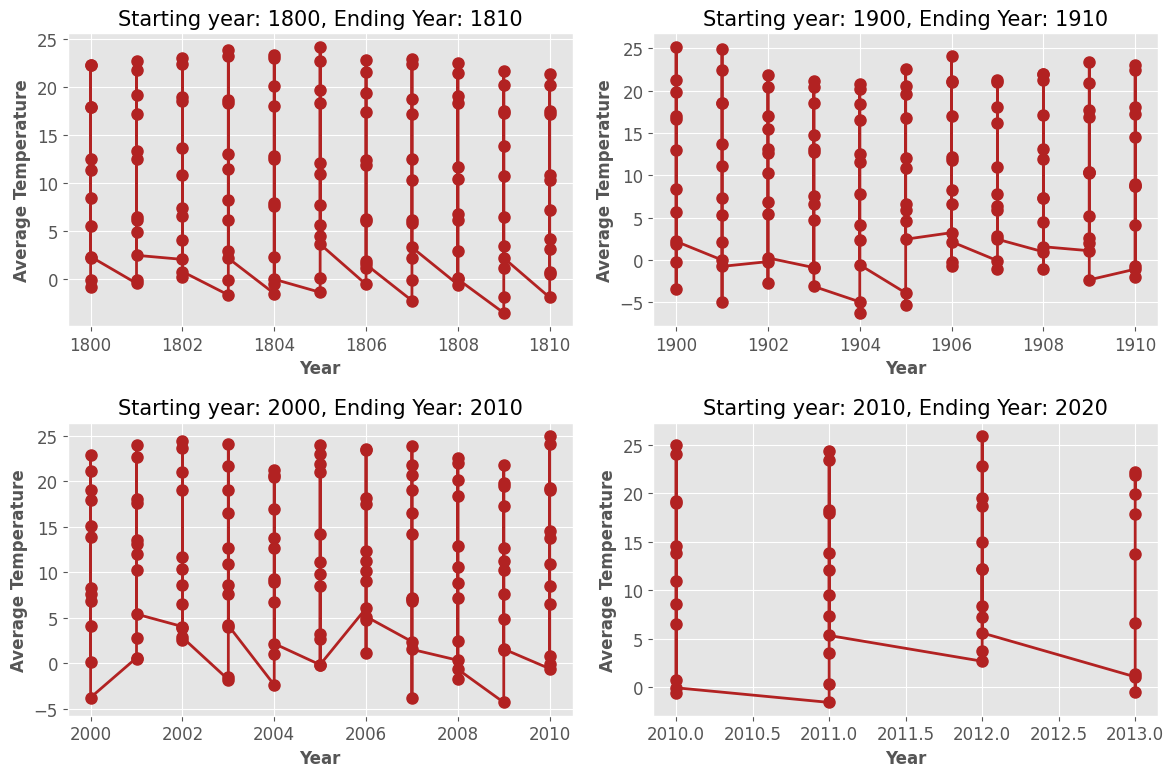

In [ ]:
# Convert 'dt' column to datetime format
df['dt'] = pd.to_datetime(df['dt'])

# Extract the year from 'dt'
df['Year'] = df['dt'].dt.year

# Define the function to plot time series for a given range of years
def plot_timeseries(start_year, end_year, city='Chicago'):
    # Filter the data for the specified city and years
    city_data = df[(df['City'] == city) & (df['Year'] >= start_year) & (df['Year'] <= end_year)]

    # Drop rows with missing temperature data
    city_data = city_data.dropna(subset=['AverageTemperature'])

    # Plot the time series
    plt.plot(city_data['Year'], city_data['AverageTemperature'], marker='o', color='firebrick')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature')
    plt.grid(True)

# Now, let's use this function to create subplots for different time ranges
plt.figure(figsize=(12, 8))

# Plot 1: 1800 to 1810
plt.subplot(2, 2, 1)
plt.title('Starting year: 1800, Ending Year: 1810', fontsize=15)
plot_timeseries(1800, 1810)

# Plot 2: 1900 to 1910
plt.subplot(2, 2, 2)
plt.title('Starting year: 1900, Ending Year: 1910', fontsize=15)
plot_timeseries(1900, 1910)

# Plot 3: 2000 to 2010
plt.subplot(2, 2, 3)
plt.title('Starting year: 2000, Ending Year: 2010', fontsize=15)
plot_timeseries(2000, 2010)

# Plot 4: 2010 to 2020
plt.subplot(2, 2, 4)
plt.title('Starting year: 2010, Ending Year: 2020', fontsize=15)
plot_timeseries(2010, 2020)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

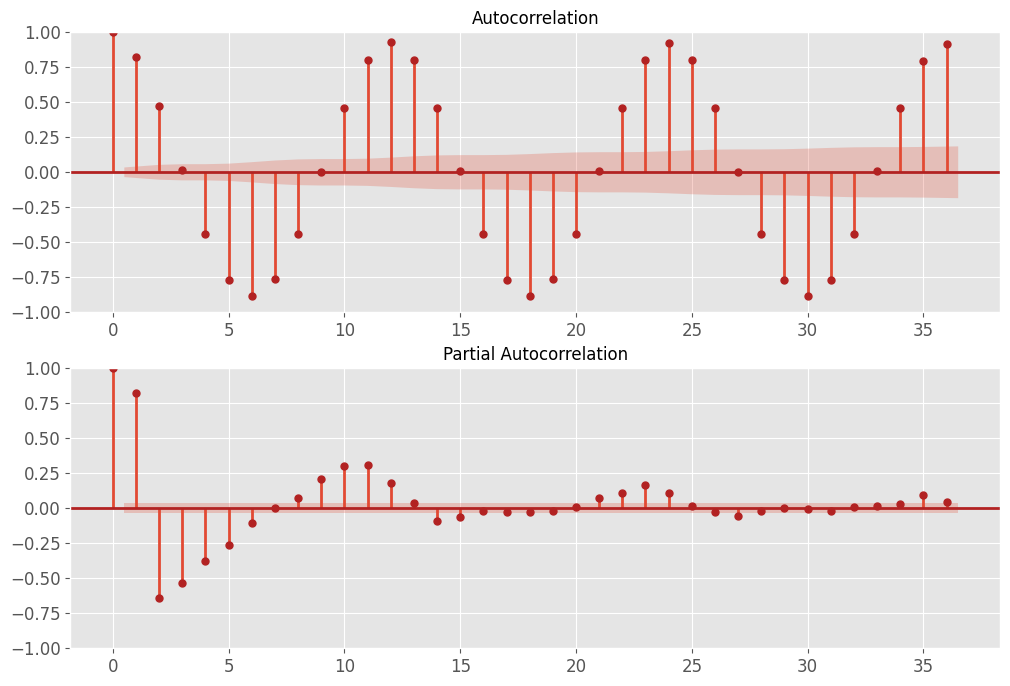

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(chicago_data.AverageTemperature, ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(chicago_data.AverageTemperature, ax=ax2,color='firebrick')

In [ ]:
result = adfuller(chicago_data.AverageTemperature)
print('ADF Statistic on the entire dataset: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the entire dataset: -5.957740857726256
p-value: 2.0738570732794548e-07
Critical Values:
	1%: -3.4323875260668344
	5%: -2.862440255934873
	10%: -2.5672492261933377


In [ ]:
result = adfuller(chicago_data.AverageTemperature[0:120])
print('ADF Statistic on the first decade: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the first decade: -2.244600322538964
p-value: 0.19045795751533423
Critical Values:
	1%: -3.490683082754047
	5%: -2.8879516565798817
	10%: -2.5808574442009578


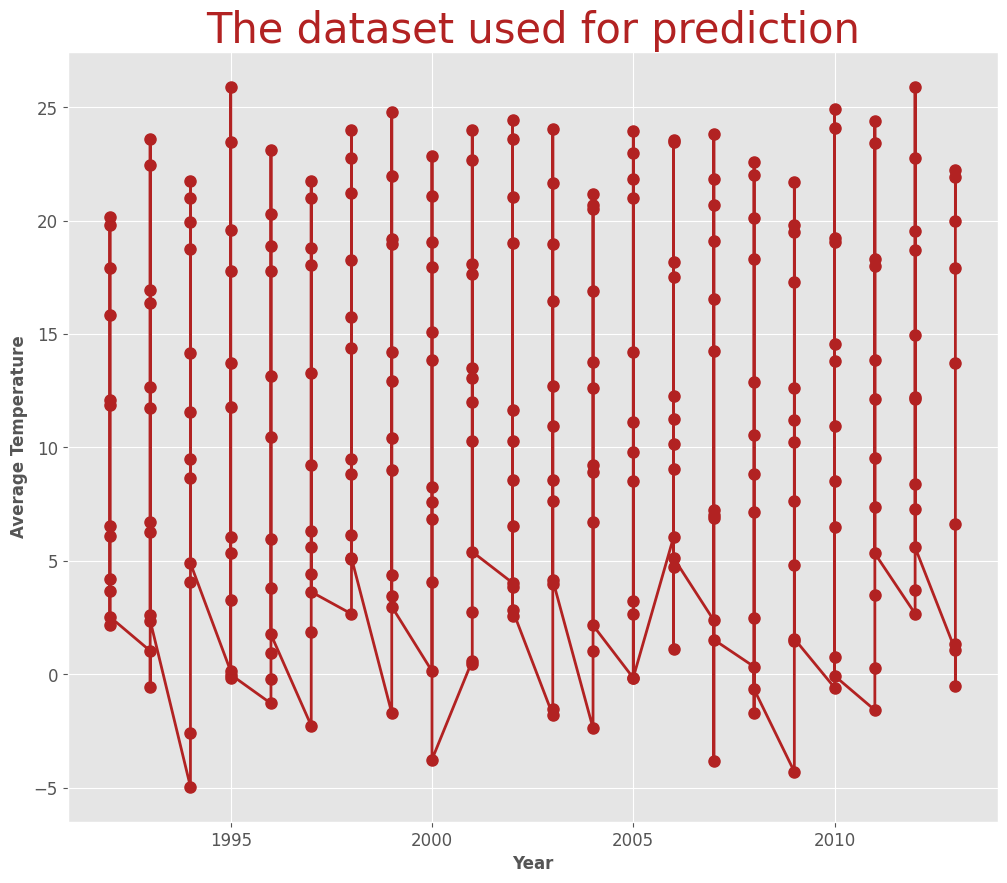

In [ ]:
#Machine Learning Model
plt.title('The dataset used for prediction', fontsize=30,color='firebrick')
plot_timeseries(1992,2013)

In [ ]:
# Convert 'dt' column to datetime format
df['dt'] = pd.to_datetime(df['dt'])

# Extract the year from 'dt'
df['Year'] = df['dt'].dt.year

# Define the function to get time series data for a range of years
def get_timeseries(start_year, end_year, city='Chicago'):
    # Filter the data for the specified city and years
    city_data = df[(df['City'] == city) & (df['Year'] >= start_year) & (df['Year'] <= end_year)]

    # Drop rows with missing temperature data
    city_data = city_data.dropna(subset=['AverageTemperature'])

    return city_data

# Now, get the time series data for 1992 to 2013
temp = get_timeseries(1992, 2013)

# Perform train/test split
N = len(temp['AverageTemperature'])
split = 0.95  # 95% for training, 5% for testing
training_size = round(split * N)

# Splitting the data
train_data = temp.iloc[:training_size]
test_data = temp.iloc[training_size:]

# Print the sizes of train and test sets
print(f"Training data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")

Training data size: 248
Test data size: 13


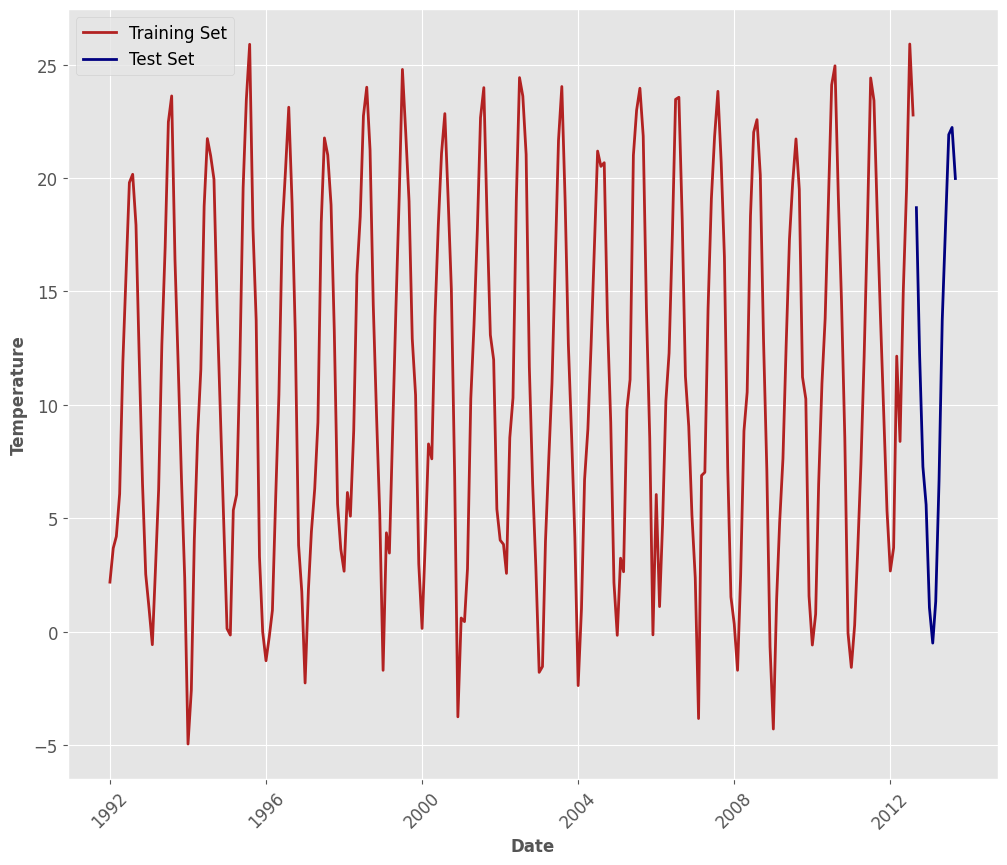

In [ ]:
# Define the function to plot the data
def plot_from_data(series, date, color='firebrick', with_ticks=True, label=None):
    plt.plot(date, series, color=color, label=label)
    if with_ticks:
        plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.grid(True)

series = train_data['AverageTemperature']
date = train_data['dt']
test_series = test_data['AverageTemperature']
test_date = test_data['dt']

# Plot the training data
plot_from_data(series, date, label='Training Set')

# Plot the test data
plot_from_data(test_series, test_date, color='navy', with_ticks=False, label='Test Set')

# Add legend and show the plot
plt.legend()
plt.show()

In [ ]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC

        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """

    results = []

    for order in tqdm_notebook(order_list):
        #try:
        model = SARIMAX(exog, order=order).fit(disp=-1)
    #except:
    #        continue

        aic = model.aic
        results.append([order, model.aic])
    #print(results)
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [ ]:
ps = range(0, 10, 1)
d = 0
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)

result_d_0 = optimize_ARIMA(order_list, exog = series)

<ipython-input-21-4b27fe9084a9>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

In [ ]:
result_d_0.head()

,"(p, d, q)",AIC
0,"(4, 0, 6)",1097.333480
1,"(4, 0, 5)",1098.088886
2,"(5, 0, 6)",1098.094928
3,"(3, 0, 5)",1098.118585
4,"(7, 0, 8)",1098.172593


In [ ]:
#first-differentiated models are considered by using these lines:
ps = range(0, 10, 1)
d = 1
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)

result_d_1 = optimize_ARIMA(order_list, exog = series)

result_d_1

<ipython-input-21-4b27fe9084a9>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

In [ ]:
result_d_1.head()

In [ ]:
# Instead of using append, use pd.concat to combine the DataFrames:
final_result = pd.concat([result_d_0, result_d_1], ignore_index=True)

In [ ]:
best_models = final_result.sort_values(by='AIC', ascending=True).reset_index(drop=True)
best_models.head()

In [ ]:
best_model_params_0 = best_models[best_models.columns[0]][0]
best_model_params_1 = best_models[best_models.columns[0]][1]

In [ ]:
best_model_0 = SARIMAX(series, order=best_model_params_0).fit()
print(best_model_0.summary())
best_model_1 = SARIMAX(series, order=best_model_params_1).fit()
print(best_model_1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizati

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                  248
Model:               SARIMAX(2, 1, 5)   Log Likelihood                -534.816
Date:                Wed, 13 Nov 2024   AIC                           1085.632
Time:                        03:49:45   BIC                           1113.707
Sample:                             0   HQIC                          1096.935
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7319      0.000   3485.974      0.000       1.731       1.733
ar.L2         -1.0000      0.000  -8978.680      0.000      -1.000      -1.000
ma.L1         -2.4540      0.864     -2.840      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


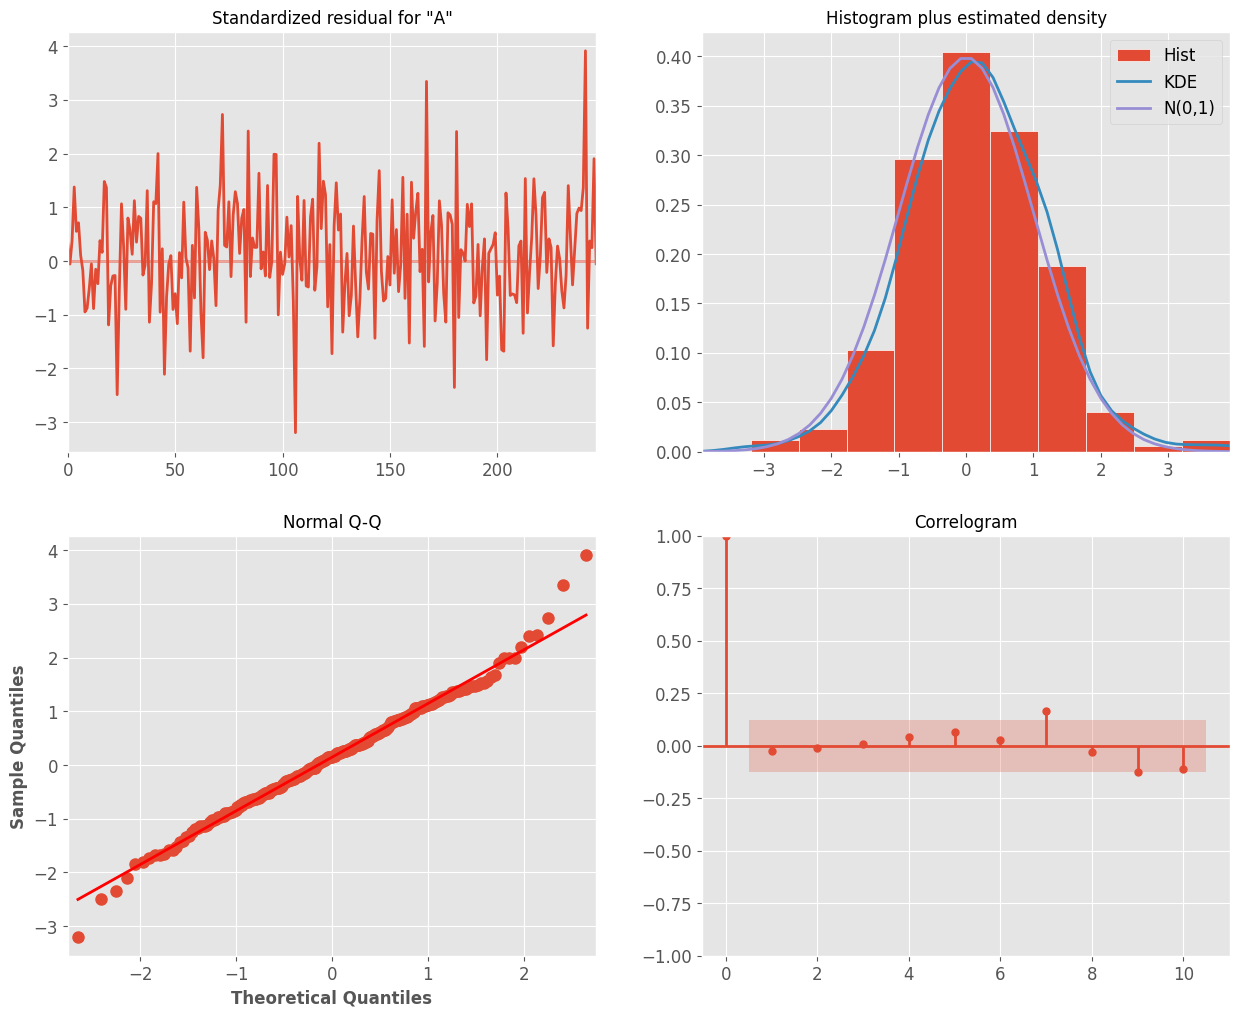

In [ ]:
#Model (2, 1, 5)
best_model_0.plot_diagnostics(figsize=(15,12))
plt.show()

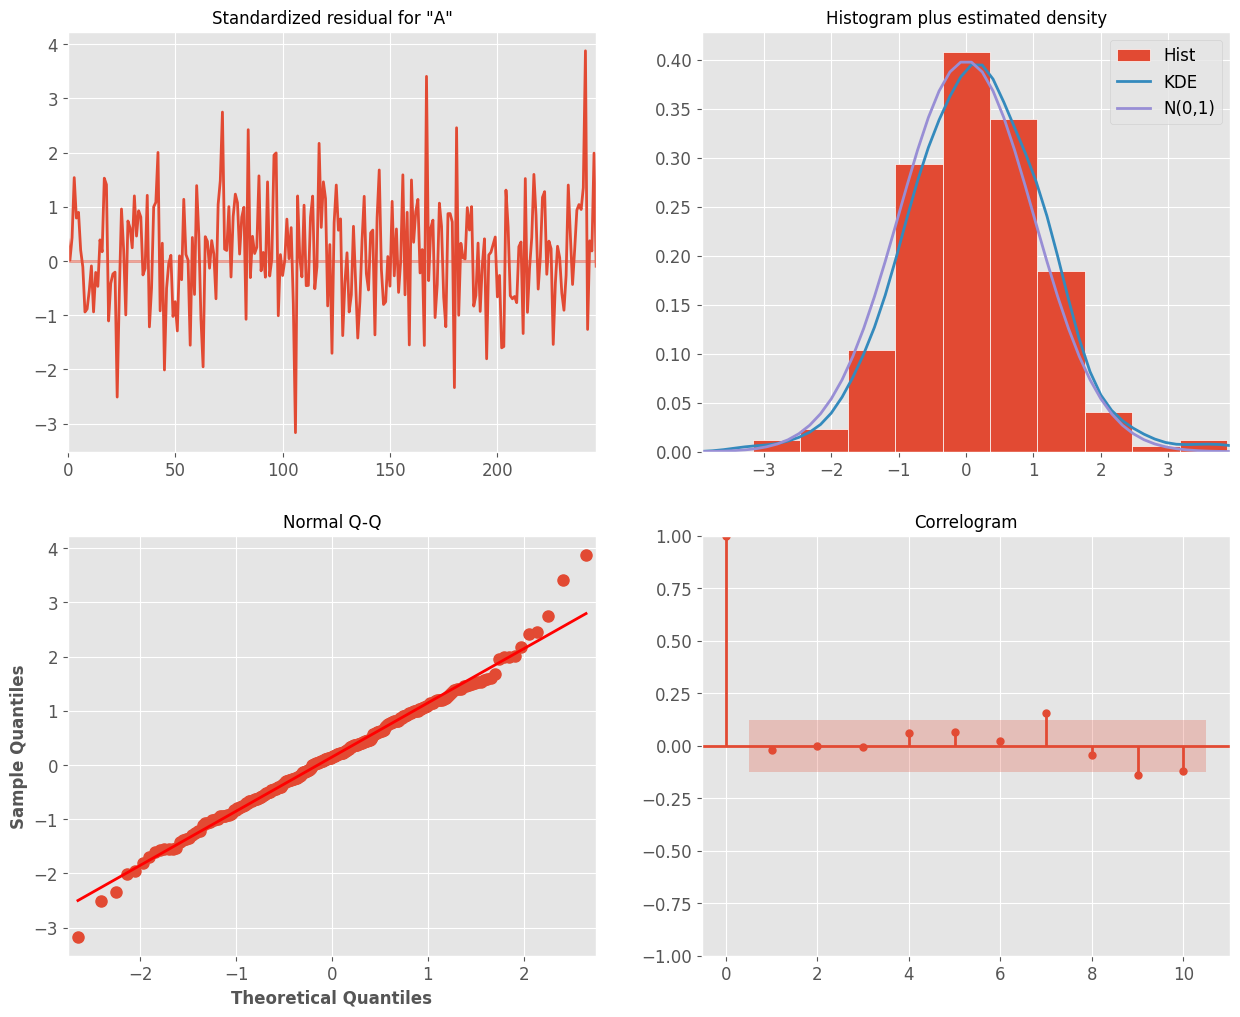

In [ ]:
#Model (2, 1, 6)
best_model_1.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
#Forecasting
# Assuming 'series' is your time series data
# and you want to split it into training and testing sets
# Define the training size (e.g., 80% of the data)
training_size = int(len(series) * 0.8)

# Calculate the test size based on the training size
test_size = len(series) - training_size

fore_l = test_size - 1
forecast = best_model_0.get_prediction(start=training_size, end=training_size + fore_l)
forec = forecast.predicted_mean
ci = forecast.conf_int(alpha=0.05)

In [ ]:
# Get the actual date values from test_date, excluding the first element
test_dates = test_date[1:].values

# Use these date values to filter chicago_data
error_test = chicago_data[chicago_data.index.isin(test_dates)]['AverageTemperatureUncertainty']

# Now, get the index values from error_test for index_test
index_test = error_test.index.tolist()

test_set = test_series[1:]

In [ ]:
lower_test = test_set-error_test
upper_test = test_set+error_test

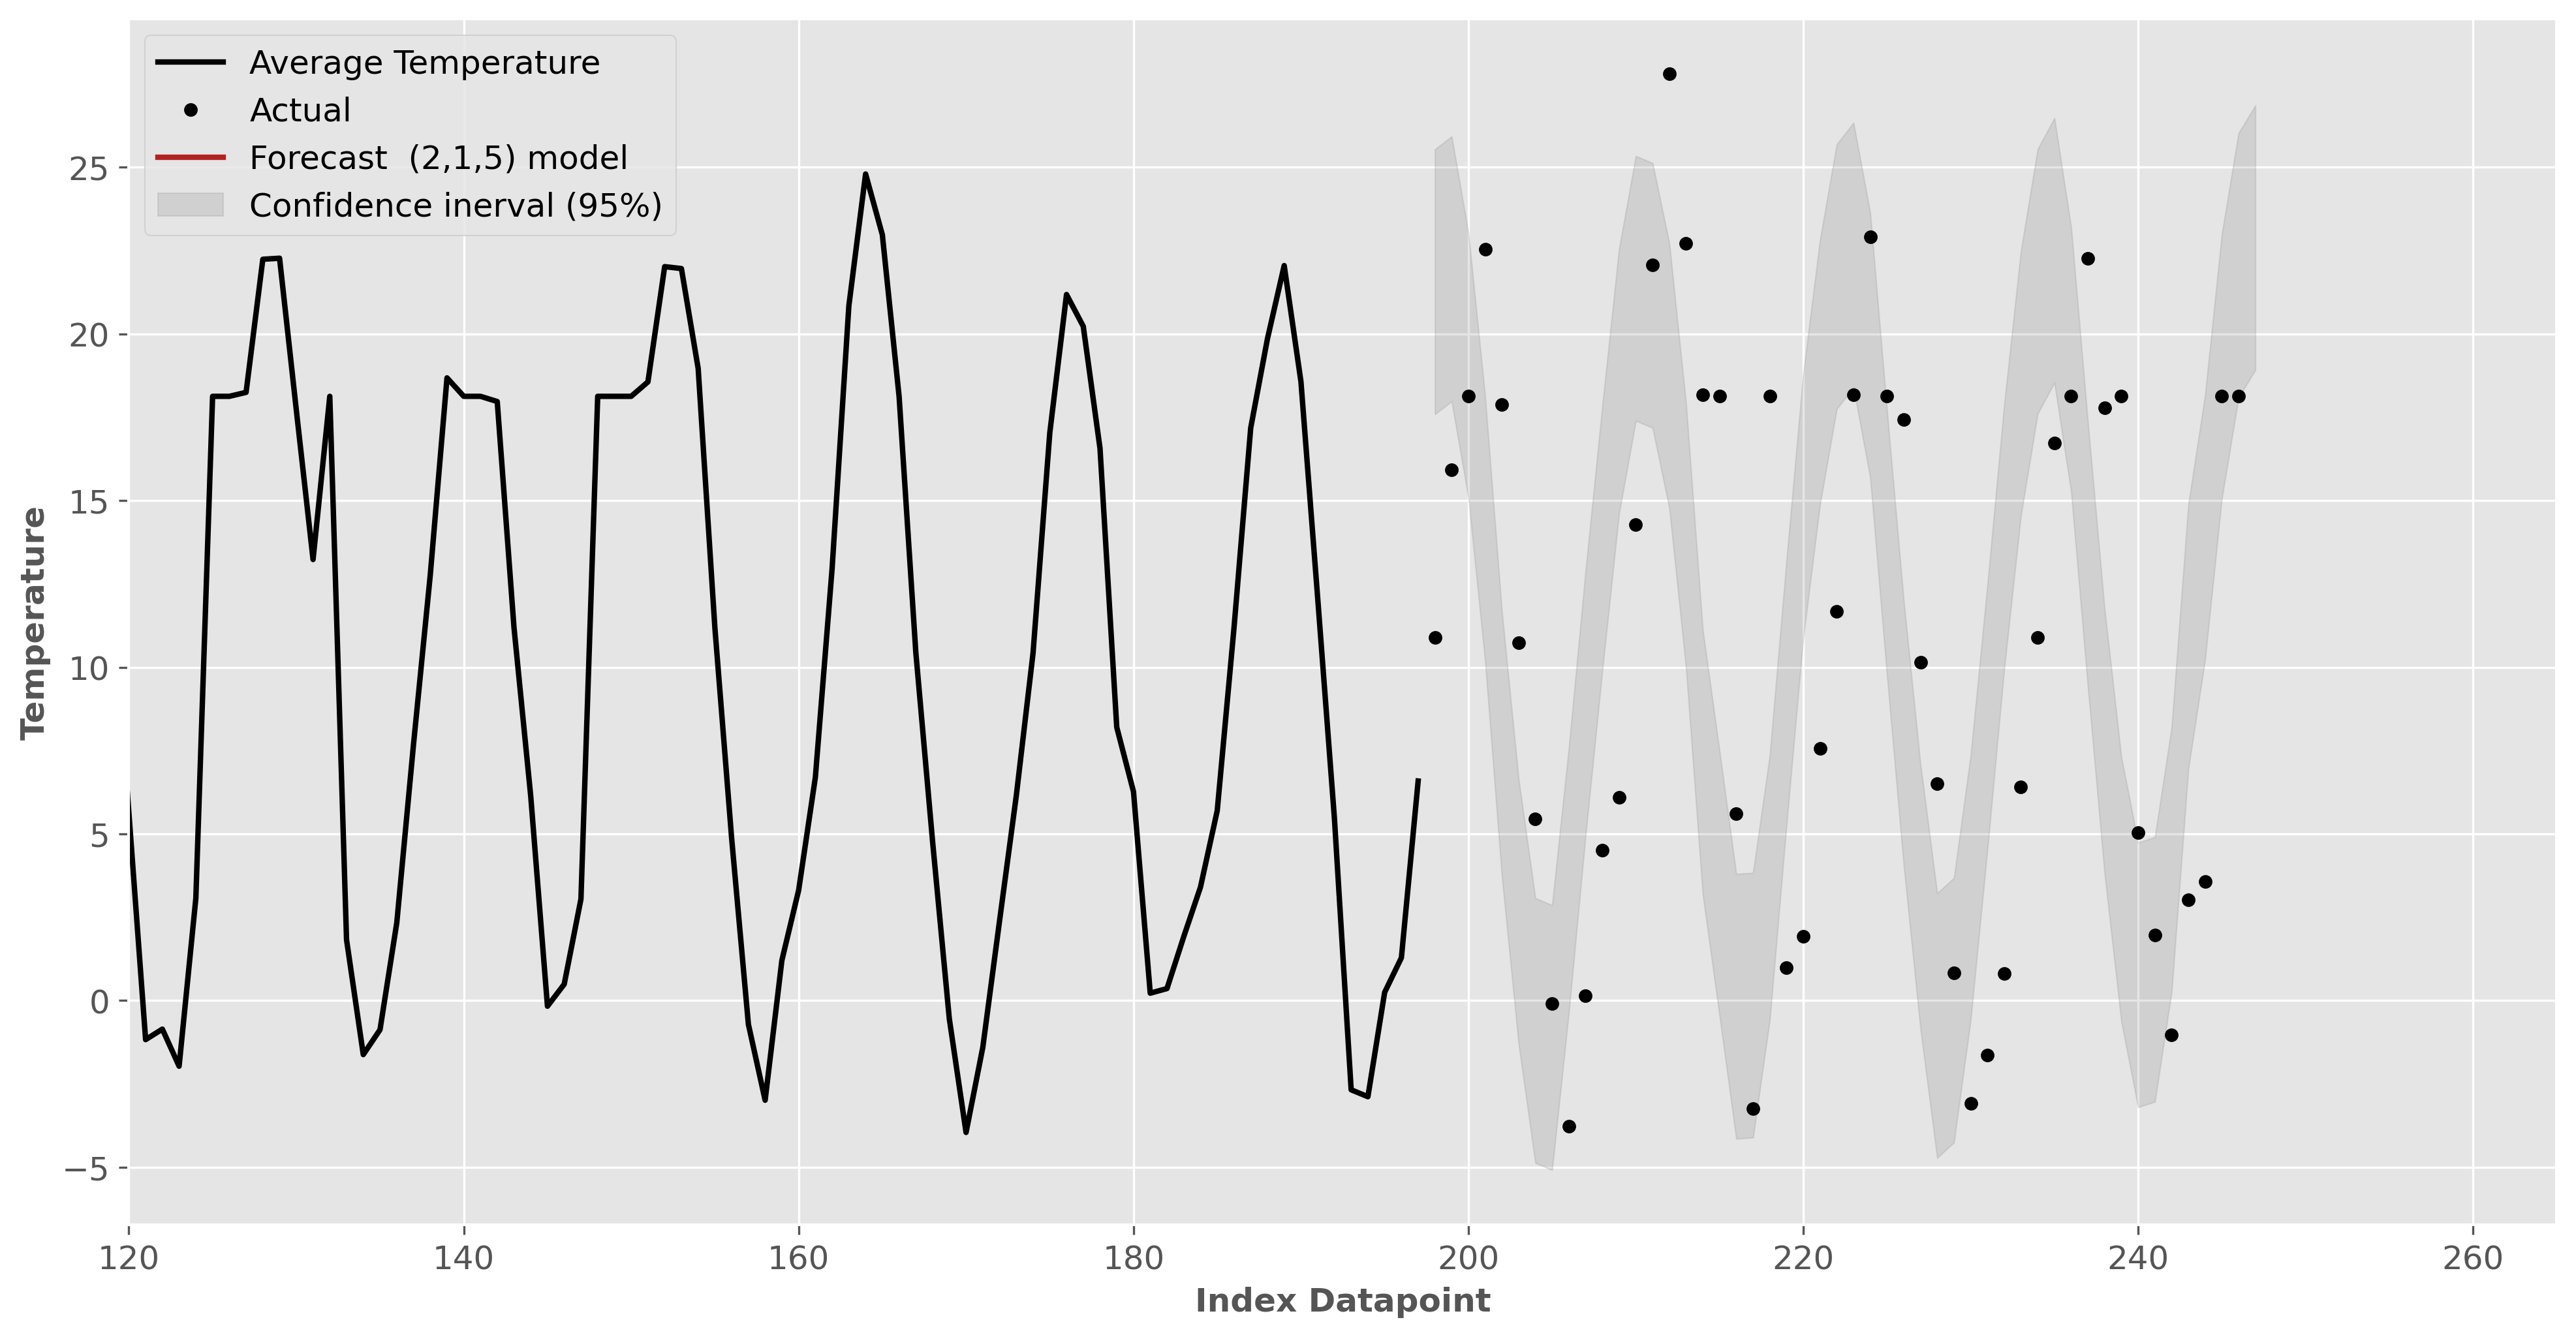

In [ ]:
fig, ax = plt.subplots(figsize=(16,8), dpi=300)
x0 = chicago_data.AverageTemperature.index[0:training_size]
x1=chicago_data.AverageTemperature.index[training_size:training_size+fore_l+1]
#ax.fill_between(forec, ci['lower Load'], ci['upper Load'])
plt.plot(x0, chicago_data.AverageTemperature[0:training_size],'k', label = 'Average Temperature')

plt.plot(chicago_data.AverageTemperature[training_size:training_size+fore_l], '.k', label = 'Actual')

#forec = pd.DataFrame(forec, columns=['f'], index = x1)
#forec.f.plot(ax=ax,color = 'Darkorange',label = 'Forecast (d = 2)')
#ax.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'],alpha=0.2, label = 'Confidence inerval (95%)',color='grey')

# Assuming 'forec' contains your forecast data:
forec = pd.DataFrame(forec, columns=['f'], index = x1) # Changed 's_forec' to 'forec'
forec.f.plot(ax=ax,color = 'firebrick',label = 'Forecast  (2,1,5) model')
ax.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'],alpha=0.2, label = 'Confidence inerval (95%)',color='grey')


plt.legend(loc = 'upper left')
plt.xlim(120,265)
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
plt.show()

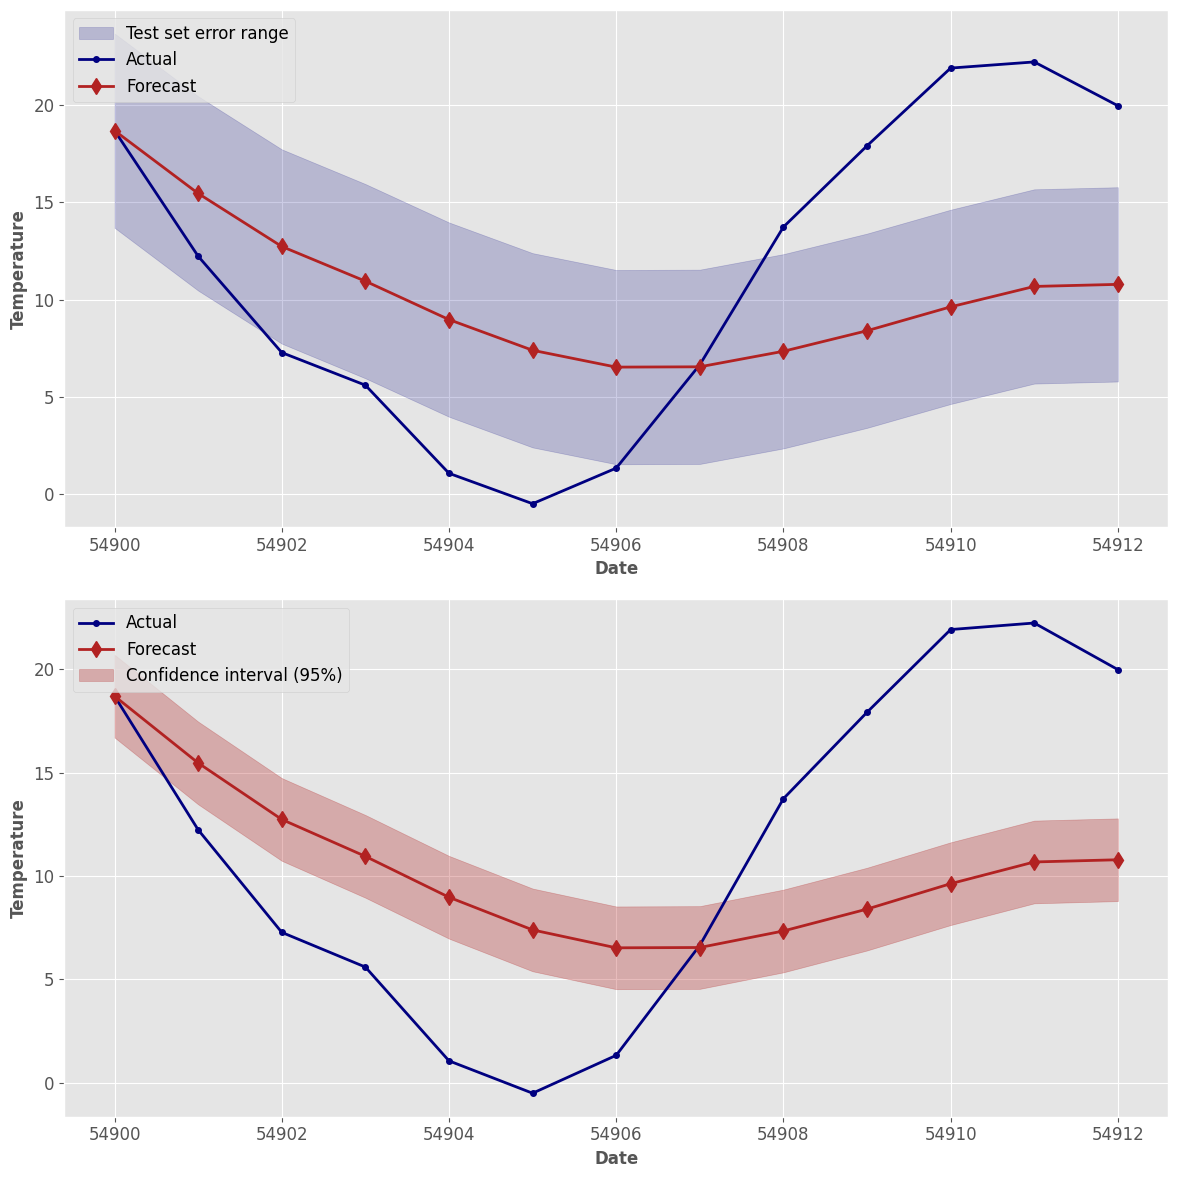

In [ ]:
# Create a simple forecast using a rolling mean
rolling_window = 12  # 12-month window for seasonal forecast

# Assuming 'AverageTemperature' is the target column for forecasting
forecast = test_data['AverageTemperature'].rolling(window=rolling_window, min_periods=1).mean()

# Ensure forecast aligns with test_data
forecast = forecast.reindex(test_data.index)  # Align forecast with test_data index

# Define a fixed error margin
error_margin = 5

# Calculate error bounds around the forecast
lower_test = forecast - error_margin
upper_test = forecast + error_margin

# Confidence interval bounds (for illustrative purposes)
ci_lower_bound = forecast - 2
ci_upper_bound = forecast + 2

# Plotting
plt.figure(figsize=(12, 12))

# Plot 1: Forecast with error range
plt.subplot(2, 1, 1)
plt.fill_between(test_data.index, lower_test, upper_test, alpha=0.2, label='Test set error range', color='navy')
plt.plot(test_data.index, test_data['AverageTemperature'], marker='.', label="Actual", color='navy') # Use 'AverageTemperature' column
plt.plot(test_data.index, forecast, marker='d', label="Forecast", color='firebrick')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

# Plot 2: Forecast with confidence interval
plt.subplot(2, 1, 2)
plt.plot(test_data.index, test_data['AverageTemperature'], marker='.', label="Actual", color='navy') # Use 'AverageTemperature' column
plt.plot(test_data.index, forecast, marker='d', label="Forecast", color='firebrick')
plt.fill_between(test_data.index, ci_lower_bound, ci_upper_bound, alpha=0.3, label='Confidence interval (95%)', color='firebrick')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

plt.tight_layout()
plt.show()

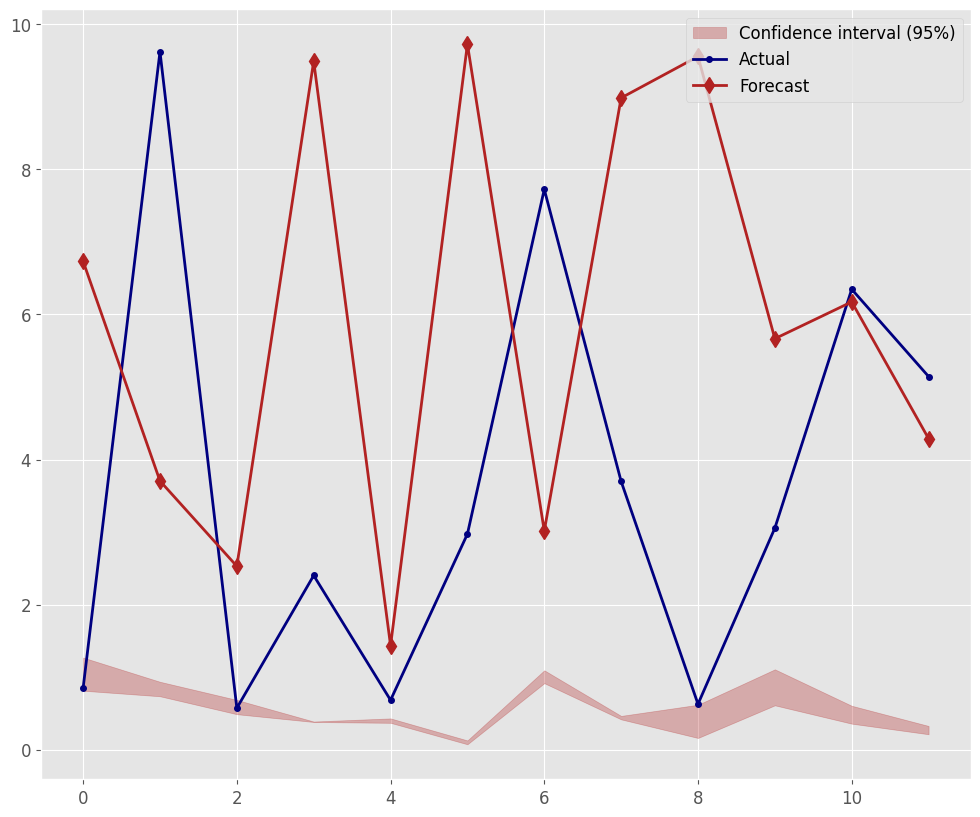

In [ ]:
x1 = np.arange(12)  # Sample x-axis data
ci_lower = np.random.rand(12)  # Simulated lower confidence interval
ci_upper = ci_lower + np.random.rand(12) * 0.5  # Simulated upper confidence interval
test_set = np.random.rand(12) * 10  # Simulated actual test set
s_forec = np.random.rand(12) * 10  # Simulated forecast data

# Plotting
plt.fill_between(x1, ci_lower, ci_upper, alpha=0.3, label='Confidence interval (95%)', color='firebrick')
plt.plot(test_set, marker='.', label="Actual", color='navy')
plt.plot(s_forec, marker='d', label="Forecast", color='firebrick')
plt.legend()
plt.show()
